# Titanic Data

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew (32% survival rate). This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. What sorts of people were more likely to survive?

### Data Dictionary

Survived: 0 = No, 1 = Yes

Pclass (Passenger Class): class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: gender

Age: Age in years 

SibSp: # of siblings / spouses traveling with an individual aboard the Titanic

Parch: # of parents / children traveling with an individual aboard the Titanic 

Ticket: ticket number

Fare: Passenger fare 

Cabin: Cabin number 

Embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton


   **Variable Notes**
   
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

SibSp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children traveled only with a nanny, therefore Parch=0 for them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Inspect the features
Note which are numerical and which are categorical.

Check for missing values. Which features can be dropped?
Which features may we want to complete/impute?

### Distribution of numerical features

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

### Distribution of categorical features

In [4]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turpin, Mrs. William John Robert (Dorothy Ann ...",male,1601,G6,S
freq,1,577,7,4,644


# Exploratory Data Analysis

## Univariate (single variable)

### Bar Chart

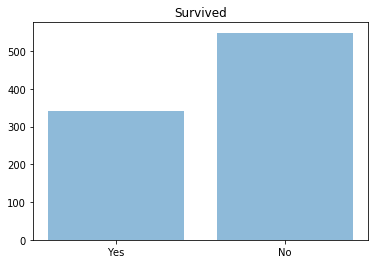

In [5]:
fig, ax = plt.subplots()

survived = df.loc[df["Survived"]==1, "Survived"].count()
not_survived = df.loc[df["Survived"]==0, "Survived"].count()

plt.bar([0,1], [survived, not_survived], align='center', alpha=0.5)
plt.xticks([0,1], ['Yes', 'No'])

plt.title('Survived')

plt.show()

### Histogram

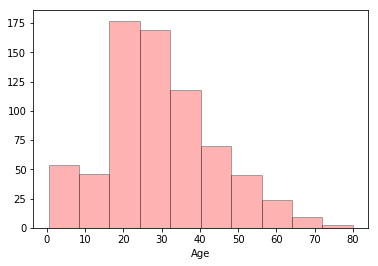

In [6]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
ax.hist(df['Age'],  color='red', alpha=.3, edgecolor='black', bins=10)
ax.set(xlabel="Age")

plt.show()

### Box Plot

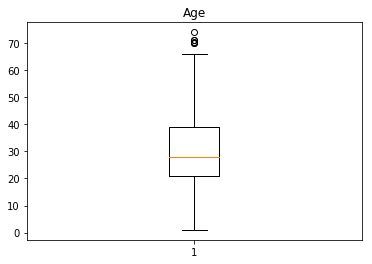

In [7]:
fig, ax = plt.subplots()
ax.boxplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'])
ax.set(title="Age")
plt.show()

## Bivariate (joint distributions)

### Histogram

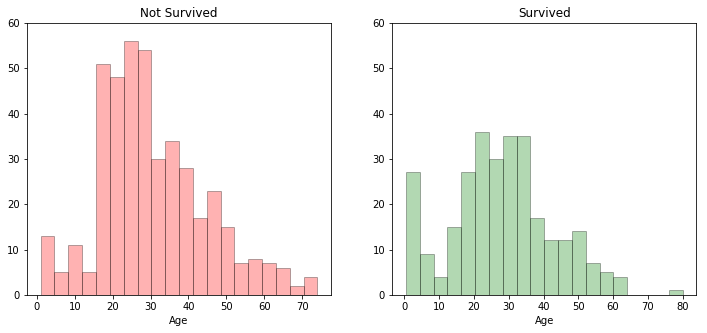

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].hist(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'],  color='red', alpha=.3, edgecolor='black', bins=20)
ax[0].set(xlabel="Age", title="Not Survived", ylim=(0,60))
ax[1].hist(df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age'],  color='green', alpha=.3, edgecolor='black', bins=20)
ax[1].set(xlabel="Age", title="Survived", ylim=(0,60))
plt.show()

### Density Plot

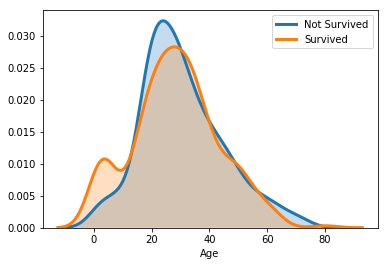

In [9]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Not Survived")
sns.distplot(df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Survived")

### Box Plot

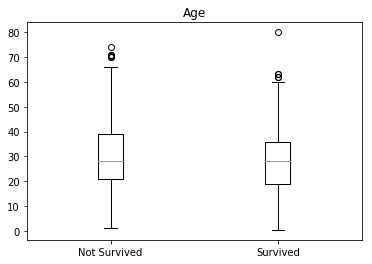

In [10]:
fig, ax = plt.subplots()
not_survived = df.loc[(df.Age.notnull()) & (df["Survived"] == 0),'Age']
survived = df.loc[(df.Age.notnull()) & (df["Survived"] == 1),'Age']
ax.boxplot([not_survived, survived])
ax.set(xticklabels=['Not Survived', 'Survived'], title="Age")
plt.show()

### Scatterplot

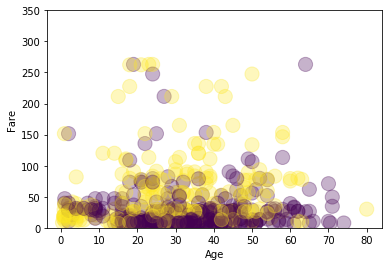

In [11]:
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Fare'], alpha=0.3,
            s=200, c=df['Survived'], cmap='viridis')
ax.set(xlabel="Age", ylabel="Fare", ylim=(0,350))
plt.show()

### Pairplot

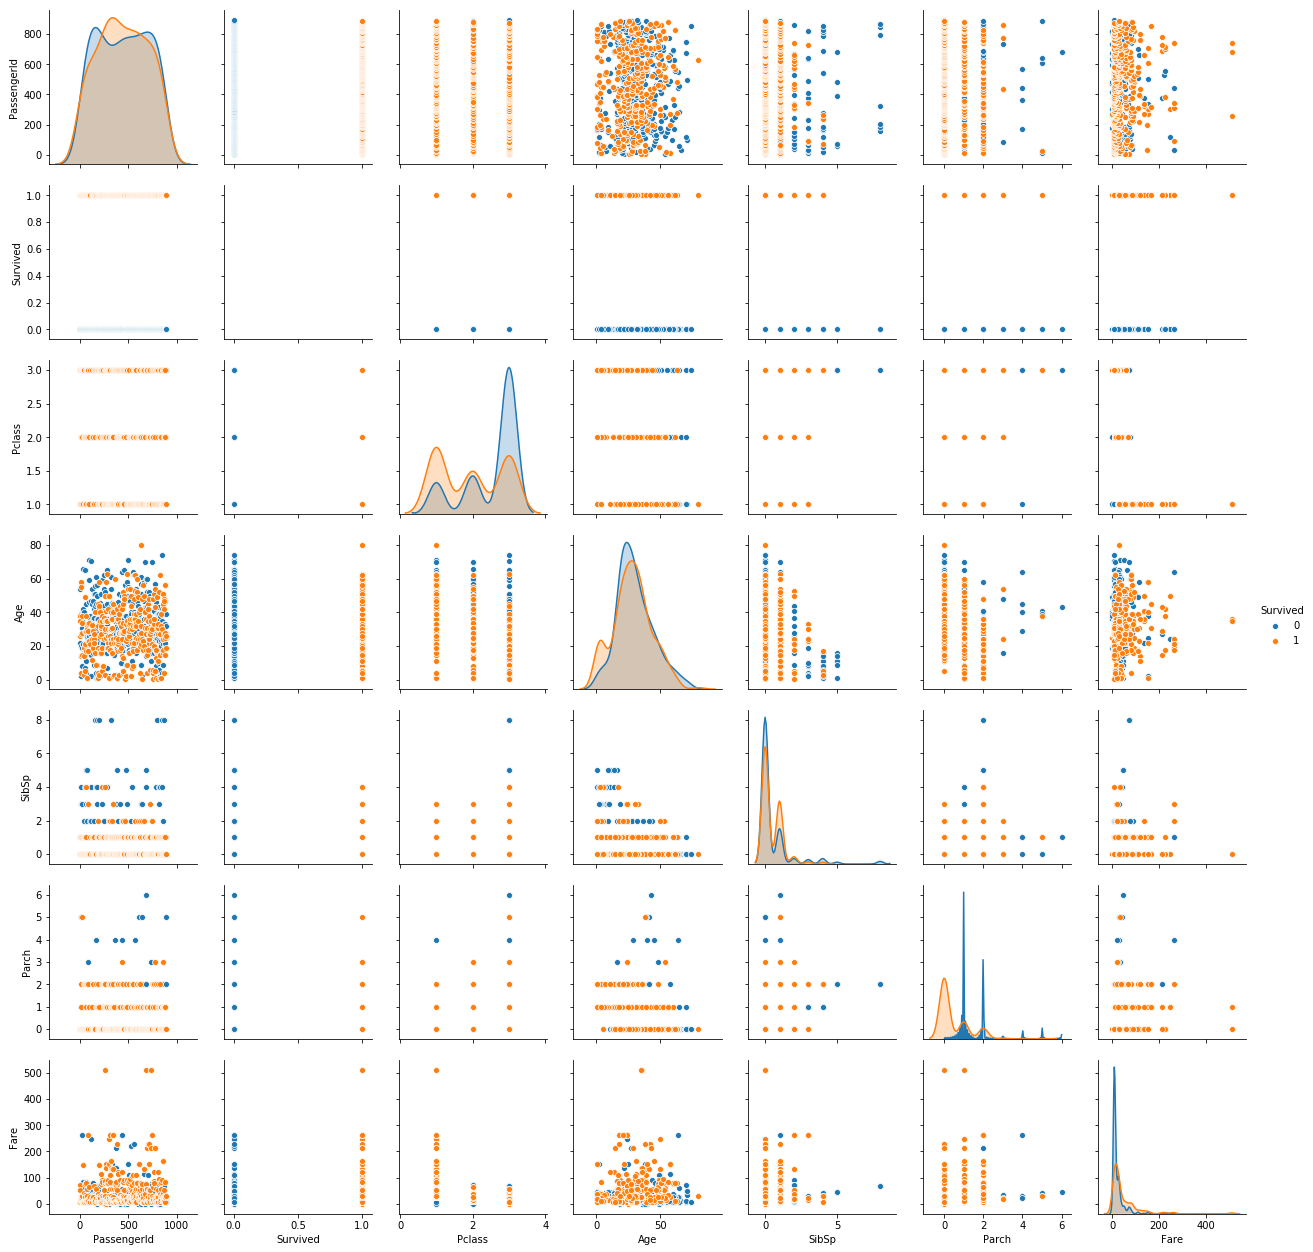

In [12]:
import warnings
warnings.filterwarnings('ignore')

pair_plot = sns.pairplot(df, hue='Survived')

# Analyze by grouping (pivoting) features

### Explore relationships between categorical features

In [13]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [16]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


## Multivariate

### Visualize relationships between categorical and continuous features

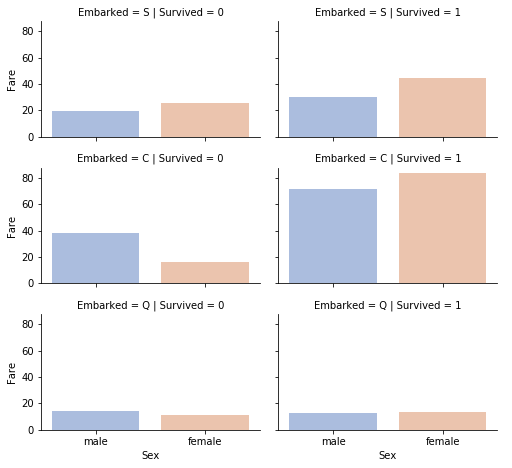

In [17]:
#grid = sns.FacetGrid(df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=["male", "female"], palette="muted", alpha=.5, ci=None)
grid.add_legend()

### Visualize relationships between multiple categorical features

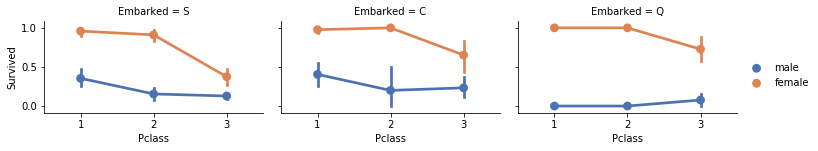

In [18]:
import warnings
warnings.filterwarnings('ignore')

grid = sns.FacetGrid(df, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1,2,3], hue_order=["male", "female"], palette='deep')
grid.add_legend()

#### Data Analysis: 
#### It appears that women, children, the upperclass, and those traveling with at least one other person, but no more than 2, had the best chances to survive the Titanic tragedy.

# Model and predict

In [ ]:
# ...
